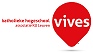<br>


**INTRODUCTION TO ARTIFICIAL INTELLIGENCE**<br>
**SEARCH ALGORITHMS**<br>
Stefaan Haspeslagh & Andy Louwyck

---



---



#**SEARCH EXERCISER: QUICK START**

`SearchExerciser` is a Python package to help students to exercise search algorithms. 

##Cloning the GitHub repo

The `SearchExerciser` package is cloned from Github repository https://github.com/alouwyck/SearchExerciser:

In [2]:
import os, shutil

# remove directory 'SearchExerciser' if it already exists
path = "SearchExerciser"
if os.path.exists(path):
    shutil.rmtree(path)

# clone SearchExerciser repository
!git clone https://github.com/alouwyck/SearchExerciser

# move SearchExerciser package directory to current working directory
os.rename(path, 'temp')
shutil.copytree(os.path.join('temp', path), path);
shutil.rmtree('temp')

Cloning into 'SearchExerciser'...
remote: Enumerating objects: 211, done.
remote: Counting objects: 100% (211/211), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 211 (delta 123), reused 147 (delta 63), pack-reused 0
Receiving objects: 100% (211/211), 138.38 KiB | 6.02 MiB/s, done.
Resolving deltas: 100% (123/123), done.


##Solving a maze problem

###Creating a maze

To create a new maze, we need to import class `Maze` from module `maze`:

In [3]:
from SearchExerciser.maze import Maze

The maze grid is defined using a list of strings. **The number of grid rows must be equal to the number of grid columns!**

The following characters are used to indicate different grid cells:
- start: `'*'`
- goal: `'o'`
- barrier: `'#'`
- free: `'.'`

The list of strings is passed to Static method `Maze.create`, which returns a `Maze` object:

In [4]:
maze = Maze.create(['....#...o',
                    '.........',
                    '#........',
                    '.#...#...',
                    '..#......',
                    '.........',
                    '.........',
                    '......#..',
                    '*......#.'])
maze

....#...o
.........
#........
.#...#...
..#......
.........
.........
......#..
*......#.

It is also possible to plot the maze:

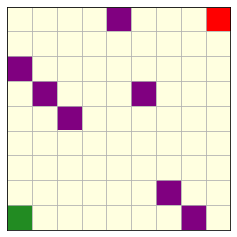

In [5]:
maze.plot()

The green cell in the lower left corner is the start and the red cell in the upper right corner is the goal. The purple cells are barriers which must be avoided.

###Finding a path

To find a path from start to goal, a blind search algorithm may be applied, such as depth-first search (DFS). To do that, we need to import class `DFS` from module `search.blind`:

In [6]:
from SearchExerciser.search.blind import DFS

We call method `search` and pass class `DFS` to it:

In [7]:
path = maze.search(DFS)

ALGORITHM: Depth-first search
RESULT: SUCCES
Elapsed time: 0.02775430679321289 seconds
Number of iterations: 66
Maximum length of queue: 48


The `path` that is found is a `maze.Path` object, which has a `plot` method:

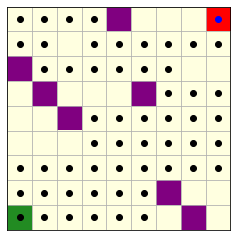

In [8]:
path.plot()

The convention is to select cells in the following order: left, right, up, and down. This explains why the path is going from the left to the right and back to the left and so on. Calling method `plot_live` visualizes this very clearly:

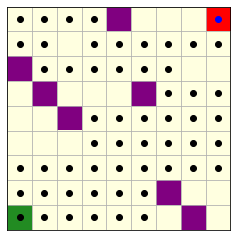

In [9]:
path.plot_live(wait=0.1)  # wait is 0.5 seconds by default

If we don't want to print the result, we set input parameter `print_result` to `False`. Let's try to find the shortest path applying the hill climbing (HC) algorithm:

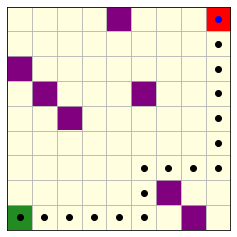

In [10]:
from SearchExerciser.search.heuristic import HC

maze.search(HC, print_result=False).plot()

Class `HC` belongs to module `search.heuristic` as it is a heuristic search algorithm. In case of a maze, the applied heuristic is the Manhattan distance between the current grid cell and the goal.

###Finding the optimal path

We may apply the A*-algorithm to find the optimal path. This optimal search algorithm is implemented in class `AS` which is imported from module `search.optimal`:

In [11]:
from SearchExerciser.search.optimal import AS

optimal_path = maze.search(AS)

ALGORITHM: A*
RESULT: SUCCES
Elapsed time: 0.015102386474609375 seconds
Number of iterations: 17
Maximum length of queue: 15
Accumulated cost of path to goal: 16.0


The accumulated cost of the found path to the goal is 16 as there are 16 moves required to get to the goal and each move has a cost of 1:

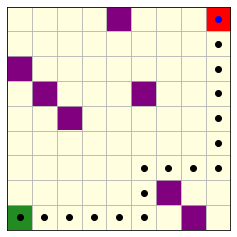

In [12]:
optimal_path.plot()

Because the cost of each move is 1, the found optimal path is also a shortest path, which consists of a minimum number of grid cells.

## Solving a graph problem

To show the difference between the shortest and the optimal path, we will create a graph problem. To define a graph, we need to import class `Graph` from module 'SearchExerciser.graph`:

In [13]:
from SearchExerciser.graph import Graph

To create the graph, we pass the edges of the graph to static method `Graph.create`. Each edge is a tuple with the name of the two vertices. The third element of the tuple is the cost of the edge. This element is only required if optimal search algorithms are applied.

In [14]:
graph = Graph.create(edges=[("S", "A", 3), ("S", "D", 4), ("A", "D", 5), ("A", "B", 4), ("D", "E", 10), 
                            ("B", "E", 5), ("B", "C", 4), ("E", "F", 4), ("F", "G", 3)])

Calling method `plot` the graph can be visualized. It requires the coordinates of all nodes:

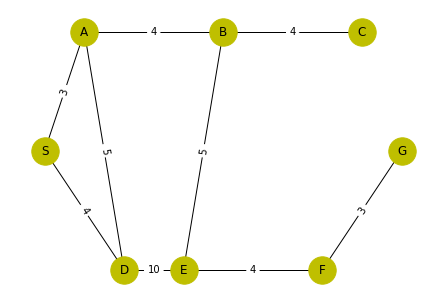

In [15]:
coordinates = dict(S=[0, 0.5], 
                   A=[1, 1],
                   D=[2, 0],
                   E=[3.5, 0],
                   B=[4.5, 1],
                   F=[7, 0],
                   C=[8, 1],
                   G=[9, 0.5])
graph.plot(coordinates)

###Finding the shortest path

Let's find the shortest path applying breadth-first search (BFS), which always gives the shortest path:

In [16]:
from SearchExerciser.search.blind import BFS

shortest_path = graph.search(BFS)
print("Shortest path:", shortest_path)

ALGORITHM: Breadth-first search
RESULT: SUCCES
Elapsed time: 0.0028455257415771484 seconds
Number of iterations: 13
Maximum length of queue: 9
Shortest path: SDEFG


As the shortest path is the path containing the minimum number of nodes, BFS finds "SDEFG". The accumulated cost of path "SDEFG" is stored in attribute `cost`: 

In [17]:
print(f"Accumulated cost of path {shortest_path}: {shortest_path.cost}")

Accumulated cost of path SDEFG: 21.0


###Finding the optimal path

Path "SABEFG" is not the shortest path, but it has the lowest accumulated cost equal to 19. Therefore it is the optimal path, which can be found, for instance, applying optimal uniform cost (OUC):

In [18]:
from SearchExerciser.search.optimal import OUC

optimal_path = graph.search(OUC)
print("Optimal path:", optimal_path)

ALGORITHM: Optimal uniform cost
RESULT: SUCCES
Elapsed time: 0.004204273223876953 seconds
Number of iterations: 15
Maximum length of queue: 7
Accumulated cost of path to goal: 19.0
Optimal path: SABEFG


When studying search algorithms, it may be useful to print the queue after each iteration, which can be done by setting optional input parameter `print_queue` to `True`:

In [24]:
graph.search(OUC, print_queue=True);

Initial queue:
[S(0.0)]

Iteration 1
Path removed from queue:
S(0.0)
New paths:
[SA(3.0),SD(4.0)]
Paths in queue:
[SA(3.0),SD(4.0)]

Iteration 2
Path removed from queue:
SA(3.0)
New paths:
[SAB(7.0),SAD(8.0)]
Paths in queue:
[SD(4.0),SAB(7.0),SAD(8.0)]

Iteration 3
Path removed from queue:
SD(4.0)
New paths:
[SDA(9.0),SDE(14.0)]
Paths in queue:
[SAB(7.0),SAD(8.0),SDA(9.0),SDE(14.0)]

Iteration 4
Path removed from queue:
SAB(7.0)
New paths:
[SABC(11.0),SABE(12.0)]
Paths in queue:
[SAD(8.0),SDA(9.0),SABC(11.0),SABE(12.0),SDE(14.0)]

Iteration 5
Path removed from queue:
SAD(8.0)
New paths:
[SADE(18.0)]
Paths in queue:
[SDA(9.0),SABC(11.0),SABE(12.0),SDE(14.0),SADE(18.0)]

Iteration 6
Path removed from queue:
SDA(9.0)
New paths:
[SDAB(13.0)]
Paths in queue:
[SABC(11.0),SABE(12.0),SDAB(13.0),SDE(14.0),SADE(18.0)]

Iteration 7
Path removed from queue:
SABC(11.0)
New paths:
[]
Paths in queue:
[SABE(12.0),SDAB(13.0),SDE(14.0),SADE(18.0)]

Iteration 8
Path removed from queue:
SABE(12.0)
New pat

Note that the accumulated cost of each path is also printed, as the optimal uniform cost algorithm uses it to sort the queue.

The A*-algorithm also finds the optimal path and its computation is more efficient as it also considers the heuristic values. The heuristic value of a node is an estimate of the cost to go from this node to the goal. In case of a graph problem, the heuristic values must be defined explicitely as node attributes:

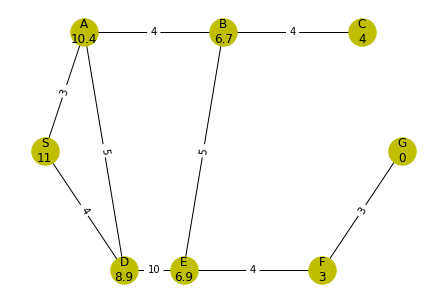

In [26]:
graph = Graph.create(edges=[("S", "A", 3), ("S", "D", 4), ("A", "D", 5), ("A", "B", 4), ("D", "E", 10), 
                            ("B", "E", 5), ("B", "C", 4), ("E", "F", 4), ("F", "G", 3)], 
                     heuristic={"S":11, "A":10.4, "B":6.7, "C":4, "D":8.9, "E":6.9, "F":3, "G":0})
graph.plot(coordinates)

In [28]:
graph.search(AS, print_queue=True)

Initial queue:
[S(11.0)]

Iteration 1
Path removed from queue:
S(11.0)
New paths:
[SA(13.4),SD(12.9)]
Paths in queue:
[SD(12.9),SA(13.4)]

Iteration 2
Path removed from queue:
SD(12.9)
New paths:
[SDA(19.4),SDE(20.9)]
Redundant paths:
[SDA(19.4)]
Paths in queue:
[SA(13.4),SDE(20.9)]

Iteration 3
Path removed from queue:
SA(13.4)
New paths:
[SAB(13.7),SAD(16.9)]
Paths in queue:
[SAB(13.7),SAD(16.9),SDE(20.9)]

Iteration 4
Path removed from queue:
SAB(13.7)
New paths:
[SABC(15.0),SABE(18.9)]
Redundant paths:
[SDE(20.9)]
Paths in queue:
[SABC(15.0),SAD(16.9),SABE(18.9)]

Iteration 5
Path removed from queue:
SABC(15.0)
New paths:
[]
Paths in queue:
[SAD(16.9),SABE(18.9)]

Iteration 6
Path removed from queue:
SAD(16.9)
New paths:
[SADE(24.9)]
Redundant paths:
[SADE(24.9)]
Paths in queue:
[SABE(18.9)]

Iteration 7
Path removed from queue:
SABE(18.9)
New paths:
[SABED(30.9),SABEF(19.0)]
Paths in queue:
[SABEF(19.0),SABED(30.9)]

Iteration 8
Path removed from queue:
SABEF(19.0)
New paths:
[SAB

SABEFG

Note that in case of A*, the f-value of each note is printed, as it is used to sort the queue. The f-value is the sum of the path's accumulated cost and the heuristic value of the path's last node. 

We also see that A* removes redundant paths. A redundant path has a cost which is larger than the cost of a path in the queue which contains the last node of the redundant path.